In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Let's create a well defined box to hold the number of particles, box_p. 
side_len = 32
N_side = 32

box_p = np.zeros((N_side, N_side, N_side))
box_p.shape

(32, 32, 32)

In [8]:
#Choose the mean number of particles, n_bar
n_bar = 5

#Populate box_p with number of particles drawn from Poisson with mean n_bar.
box_p = np.random.poisson(lam=n_bar, size=box_p.shape)

In [10]:
#Now let's get the density contrast
box_delx = (box_p - n_bar)/n_bar

In [42]:
#Now let's take the fourier transform of box_delx to get box_delk
box_delk = np.fft.fftn(box_delx, norm='ortho')

#Getting the corresponding k values along 1d axis
k_vals = np.fft.fftfreq(N_side)

In [50]:
#Power spectrum of the Poisson field box_delx
#First I create a 3d array of same shape as box_delk, with values equal
#to |k| value corresponding to same position in box_delk.
temb_mesh = np.meshgrid(k_vals, k_vals, k_vals, indexing='ij')
modk_grid = np.sqrt(temb_mesh[0] ** 2 + temb_mesh[1] ** 2 + temb_mesh[2] ** 2)

#Lets make the k's needed for the power spectrum.
k_min = 1/N_side
k_max = 1/2
assert (N_side % 2 == 0)
k_for_P = np.linspace(k_min, k_max, N_side//2)

In [70]:
#Now let's iterate through the k_for_P and find the index of modk_grid with k
#that falls between and find power spectrum pk.
pk = np.zeros(len(k_for_P)-1)
for i, (k1, k2) in enumerate(zip(k_for_P[:-1], k_for_P[1:])):
    pk[i] = np.average(np.absolute(box_delk[np.where((modk_grid > k1) & (modk_grid < k2))]) ** 2)

In [72]:
#Now we have to make a desired power spectrum pk_cor
k_for_P_mid = (k_for_P[:-1] + k_for_P[1:])/2
pk_cor = np.power(k_for_P_mid, -1.2)

Text(0, 0.5, '$P_{cl}(k)$')

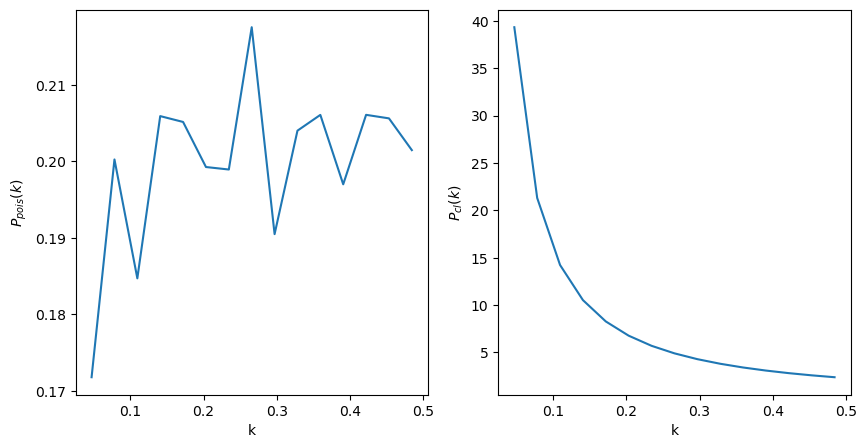

In [91]:
#plotting the pks
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.plot(k_for_P_mid, pk)
ax2.plot(k_for_P_mid, pk_cor)

ax1.set_xlabel('k')
ax1.set_ylabel(r'$P_{pois}(k)$')
ax2.set_xlabel('k')
ax2.set_ylabel(r'$P_{cl}(k)$')

In [93]:
#Make a new delk.
box_delk_new = np.copy(box_delk)

#modify the delk using the chosen power spectrum
for i, (k1, k2) in enumerate(zip(k_for_P[:-1], k_for_P[1:])):
    temp_ind = np.where((modk_grid > k1) & (modk_grid < k2))
    box_delk_new[temp_ind] = box_delk[temp_ind] * (np.sqrt(pk_cor[i] + pk[i])) / np.sqrt(pk[i])

#Now we need to inverse fourier transfor box_delk_new to get box_delx_new
box_delx_new = np.fft.ifftn(box_delk_new, norm='ortho')

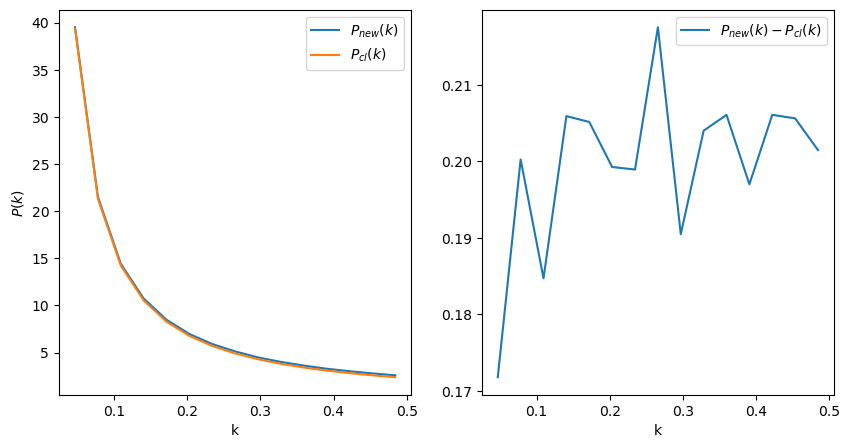

In [106]:
#finding the new power spectrum
pk_new = np.zeros(len(k_for_P)-1)
for i, (k1, k2) in enumerate(zip(k_for_P[:-1], k_for_P[1:])):
    pk_new[i] = np.average(np.absolute(box_delk_new[np.where((modk_grid > k1) & (modk_grid < k2))]) ** 2)

#plotting the new psd vs the given one
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(k_for_P_mid, pk_new, label=r'$P_{new}(k)$')
ax1.plot(k_for_P_mid, pk_cor, label=r'$P_{cl}(k)$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$P(k)$')
ax1.legend()
ax2.plot(k_for_P_mid, pk_new-pk_cor, label=r'$P_{new}(k) - P_{cl}(k)$')
ax2.set_xlabel('k')
ax2.legend()

In [ ]:
#Now we need to get the correlation function of both the new and the old boxes.


In [86]:
modk_grid[np.where((modk_grid < k_min) | (modk_grid > k_max))]

array([0.        , 0.50097561, 0.50389111, ..., 0.50967208, 0.5048592 ,
       0.50194933])